# Optimization and Gradient Descent

Supervised machine learning models (i.e., models that predict an output given an input) “learn” by optimizing their parameters.

When optimizing, models generally operate  sequence of steps (Page: 29)

In [4]:
# data management
import numpy as np                   # for linear algebra
import pandas as pd                  # for tabular data manipulation and processing

# data visualization and graphics
import matplotlib.pyplot as plt      # for visualization fundamentals
import seaborn as sns                # for pretty visualizations
import cv2                           # for image manipulation

# misc
from tqdm.notebook import tqdm       # for progress bars
import math                          # for calculation
import sys                           # for system manipulation
import os  

from sklearn.model_selection import train_test_split as tts


In [5]:
drinking_water = "drinking_water_potability.csv"

In [3]:
data = pd.read_csv(drinking_water)
features = data["ph"]
label = data['Potability']

In [4]:
print(features.max())
print(features.min())

14.0
0.22749905


-----------------

Trazar la diferencia de muestra en la distancia de dos puntos seleccionados en un hipercubo como dimensionalidad
aumenta:

 The difference between the two distances is $√(n)-√(n-1)$

In [14]:
#features = np.linspace(1, 100, 500)
#labels = np.sqrt(features) - np.sqrt(features - 1)

In [ ]:
X_train, X_test, y_train, y_test = tts(features, label, test_size=0.2, random_state=42)

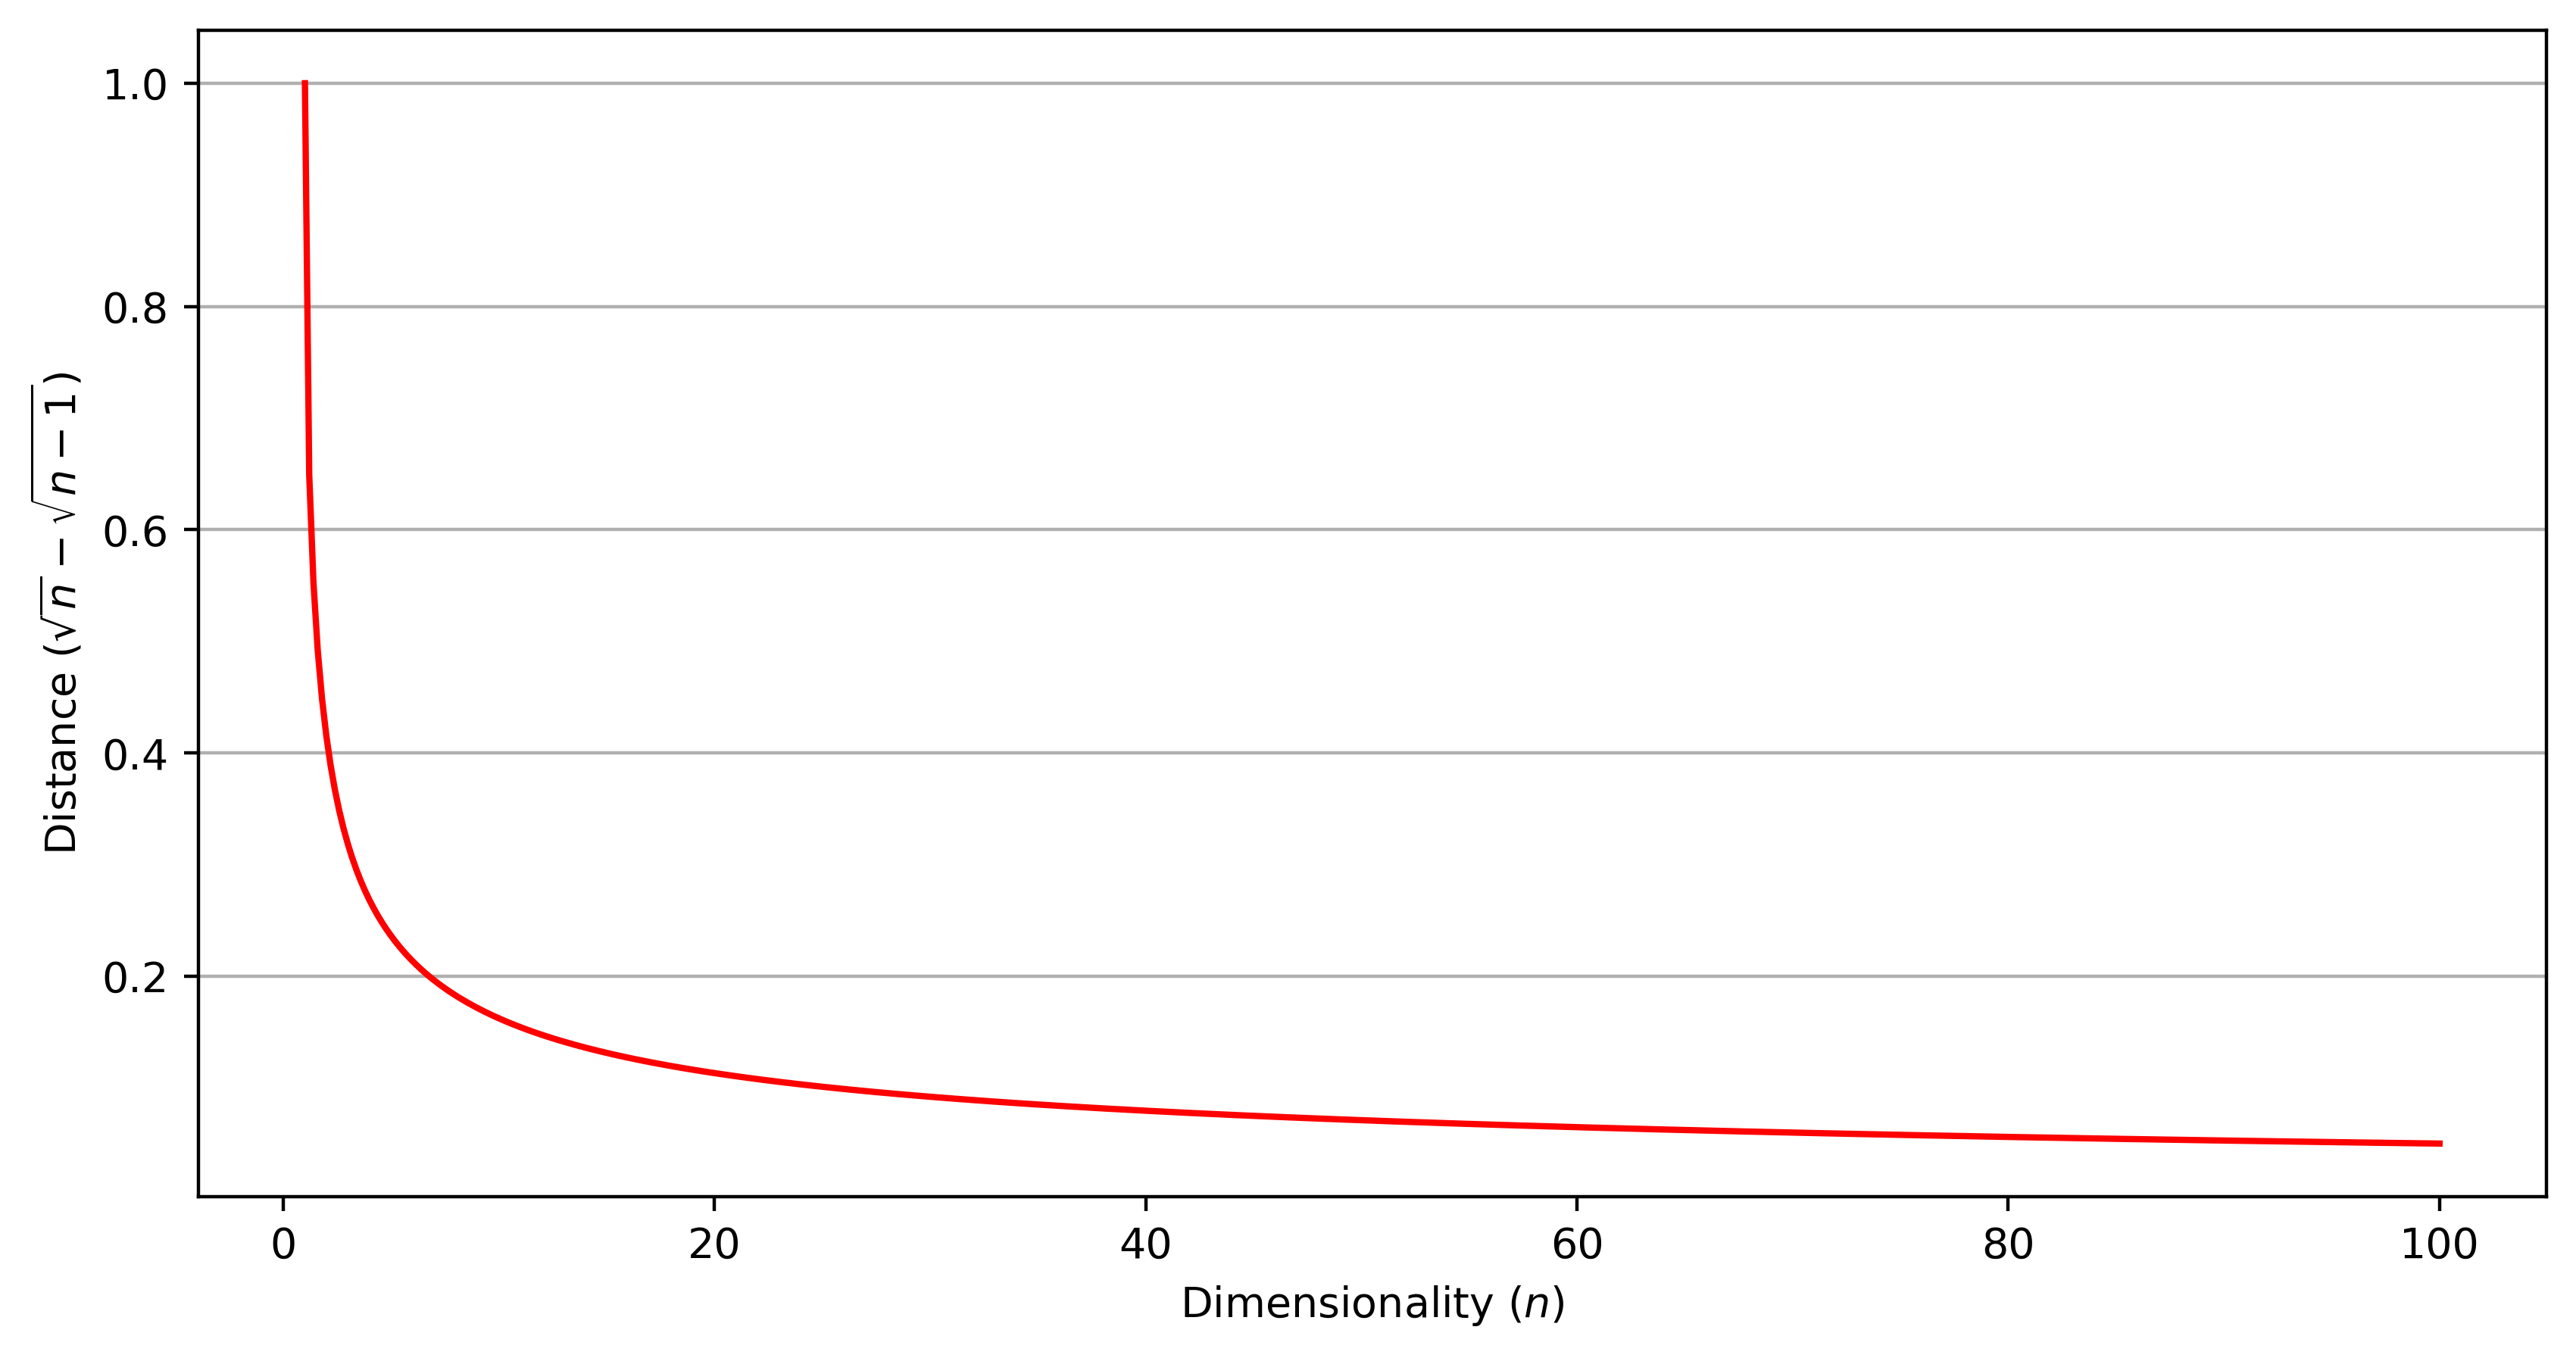

In [13]:
plt.figure(figsize=(10, 5), dpi=400)
plt.plot(features, labels, color='red')
axes = plt.gca()
axes.yaxis.grid()
plt.ylabel('Distance ($\sqrt{n} - \sqrt{n-1}$)')
plt.xlabel('Dimensionality ($n$)')
plt.show()

-----------------

In [5]:
# Asegúrate de tener un conjunto de datos válido antes de proceder
assert len(features) == len(label)

In [6]:
transformed_features = np.sin(features) + features**2/10 + 1

In [8]:
# Minimizing c(x) with gradient descent (Pag 31)
cost = lambda x: np.sin(x) + x**2 / 10 + 1
gradient = lambda x: np.cos(x) + 2*x / 10
learn_rate = 0.5
curr_x = -4
for iteration in range(10):
    curr_x += -learn_rate * gradient(curr_x)
print(curr_x)
print(cost(curr_x))
print(gradient(curr_x))

-1.3074921096907361
0.20541830741279132
-0.0012261169436203478


c(x)=

In [9]:
features = np.linspace(features.min(), features.max(), 100)[:, np.newaxis]
# Necesitar una función de transformación diferente
targets = np.sin(features) + features**2/10 + 1
features.shape

(100, 1)

In [ ]:
print(features)

In [10]:
f = lambda x:np.sin(x) + x**2/10 + 1

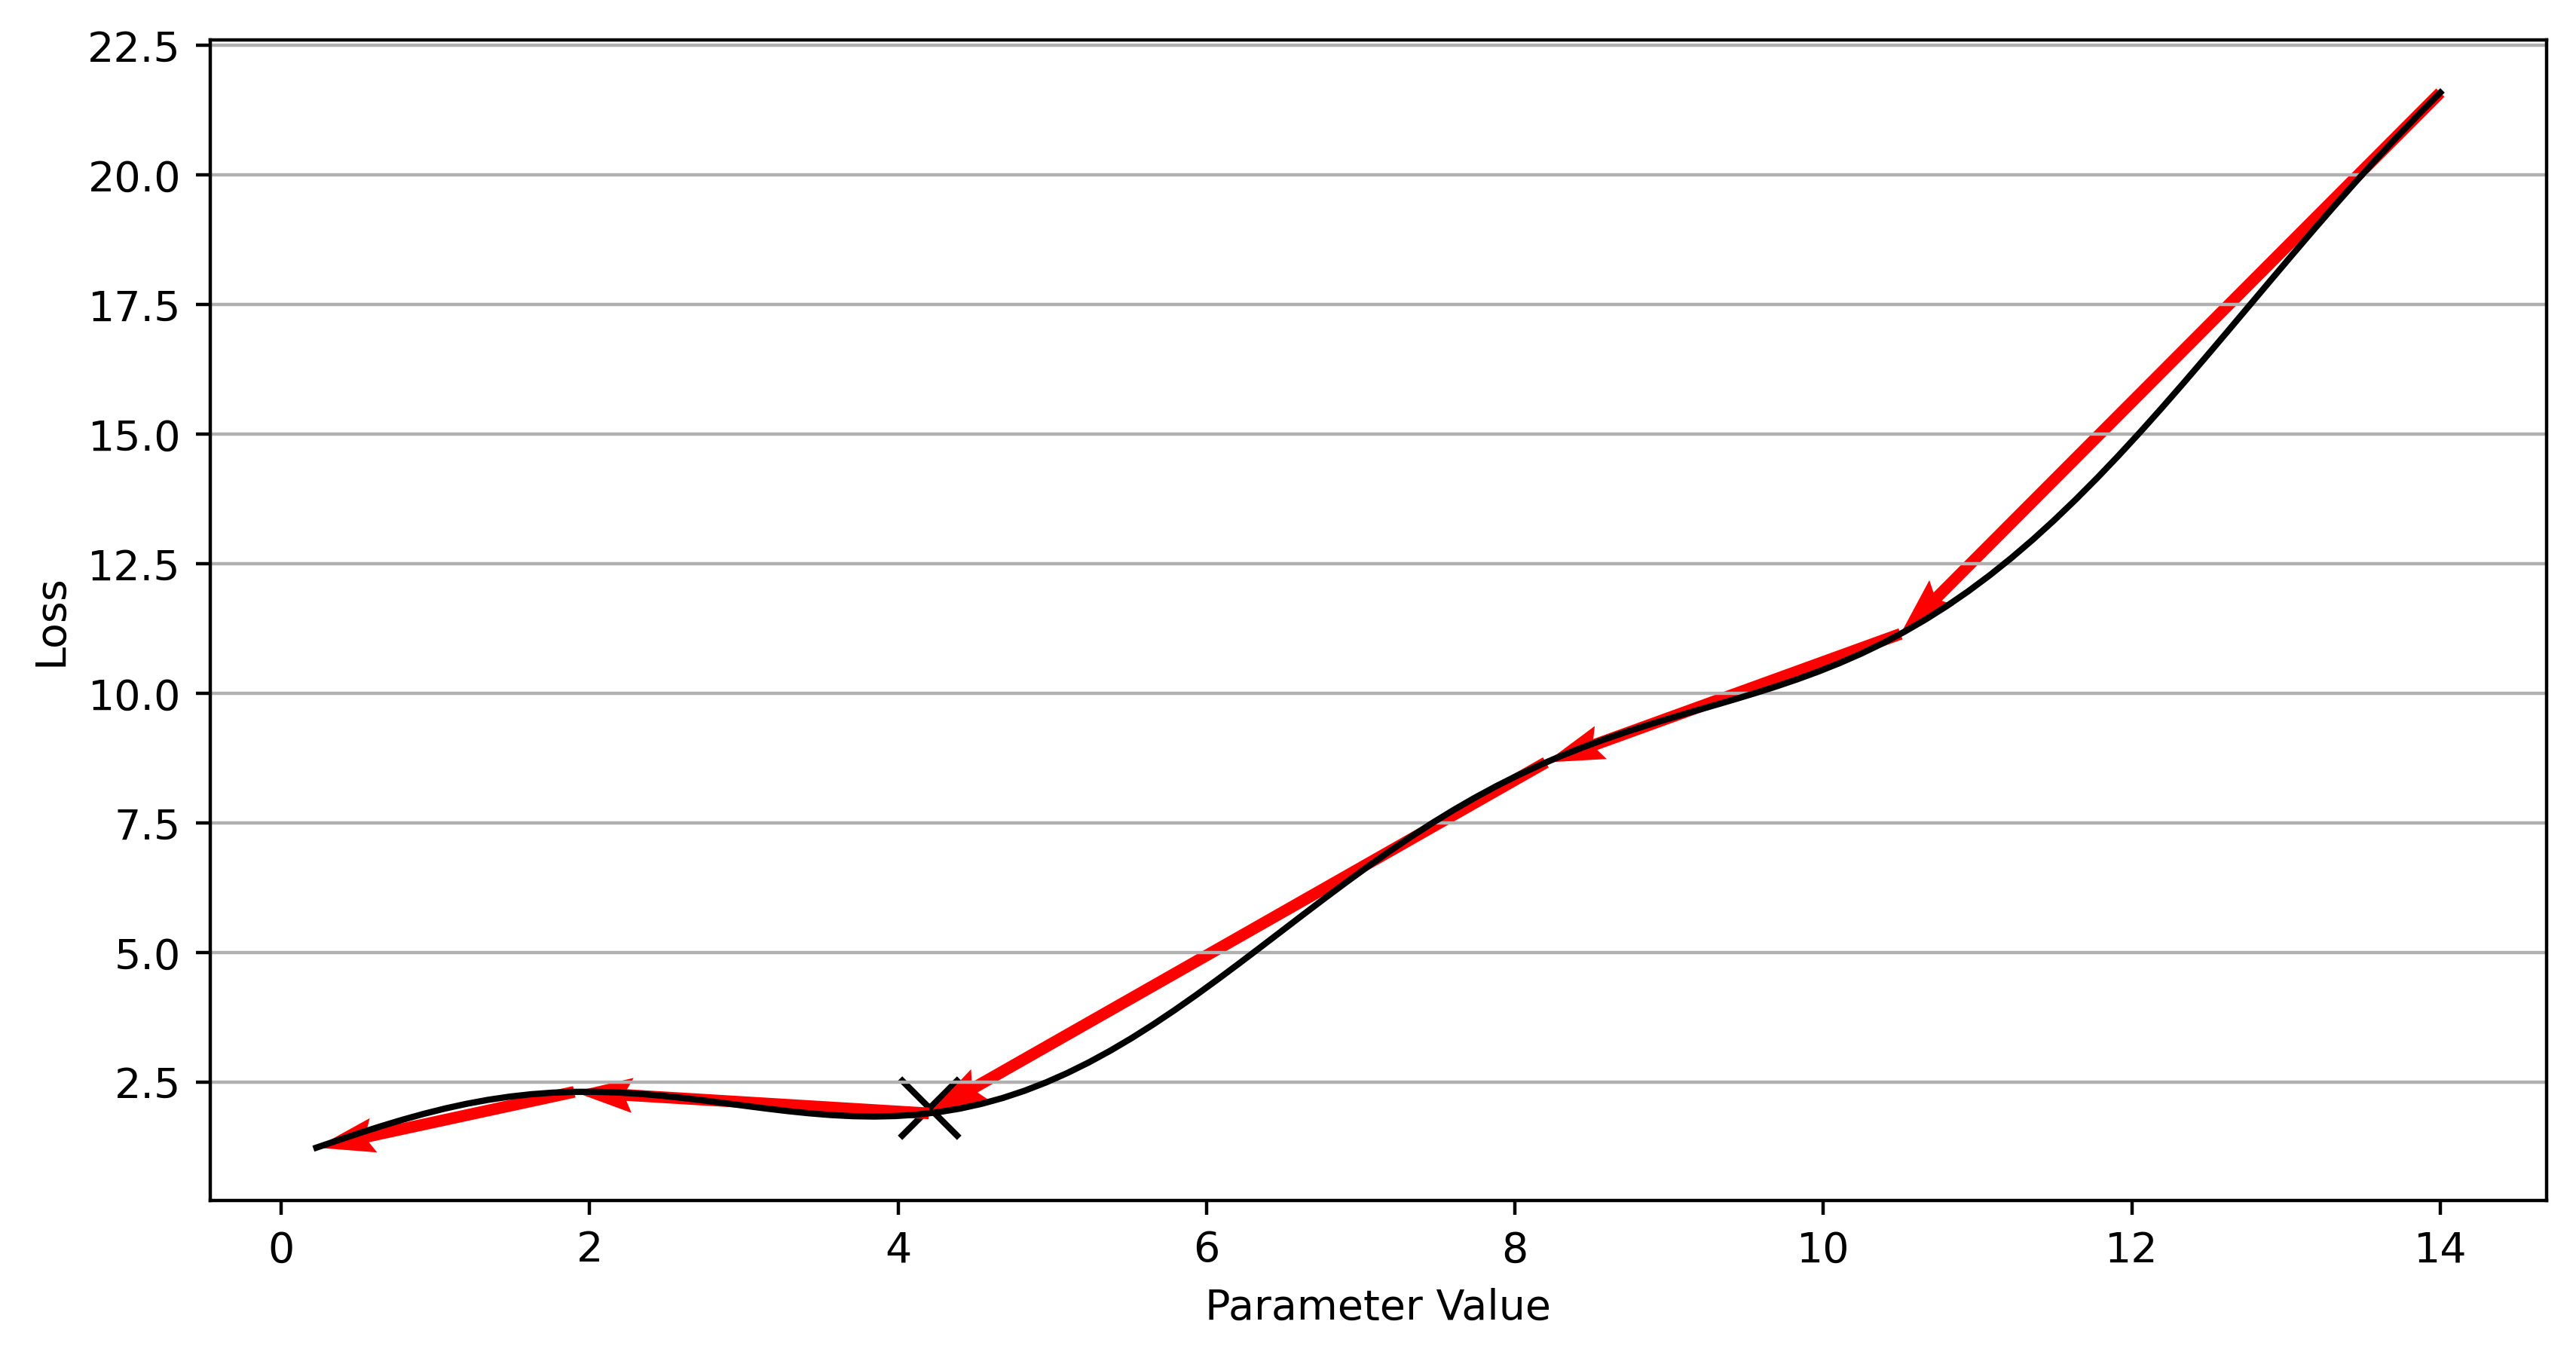

In [11]:
plt.figure(figsize=(10, 5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()

plt.scatter([4.2], [2], color='black', marker='x', s=200)
# red line
x = np.array([features.max(), 10.5, 8.2, 4.2, 1.9, features.min()])
axes.quiver(x[:-1], 
          f(x)[:-1], 
          ([x[i+1]-x[i] for i in range(len(x[:-1]))]), 
          ([f(x)[i+1]-f(x)[i] for i in range(len(f(x)[:-1]))]), 
          angles='xy', 
          scale_units='xy', 
          scale=1,
          linestyle='--',
          width=0.005,
          color='red')

plt.plot(features, targets, color='black')

plt.ylabel('Loss')
plt.xlabel('Parameter Value')

plt.show()

Let's plot various gradient descent minimizations for the function $\sin x + \frac{x^2}{10} + 1$.

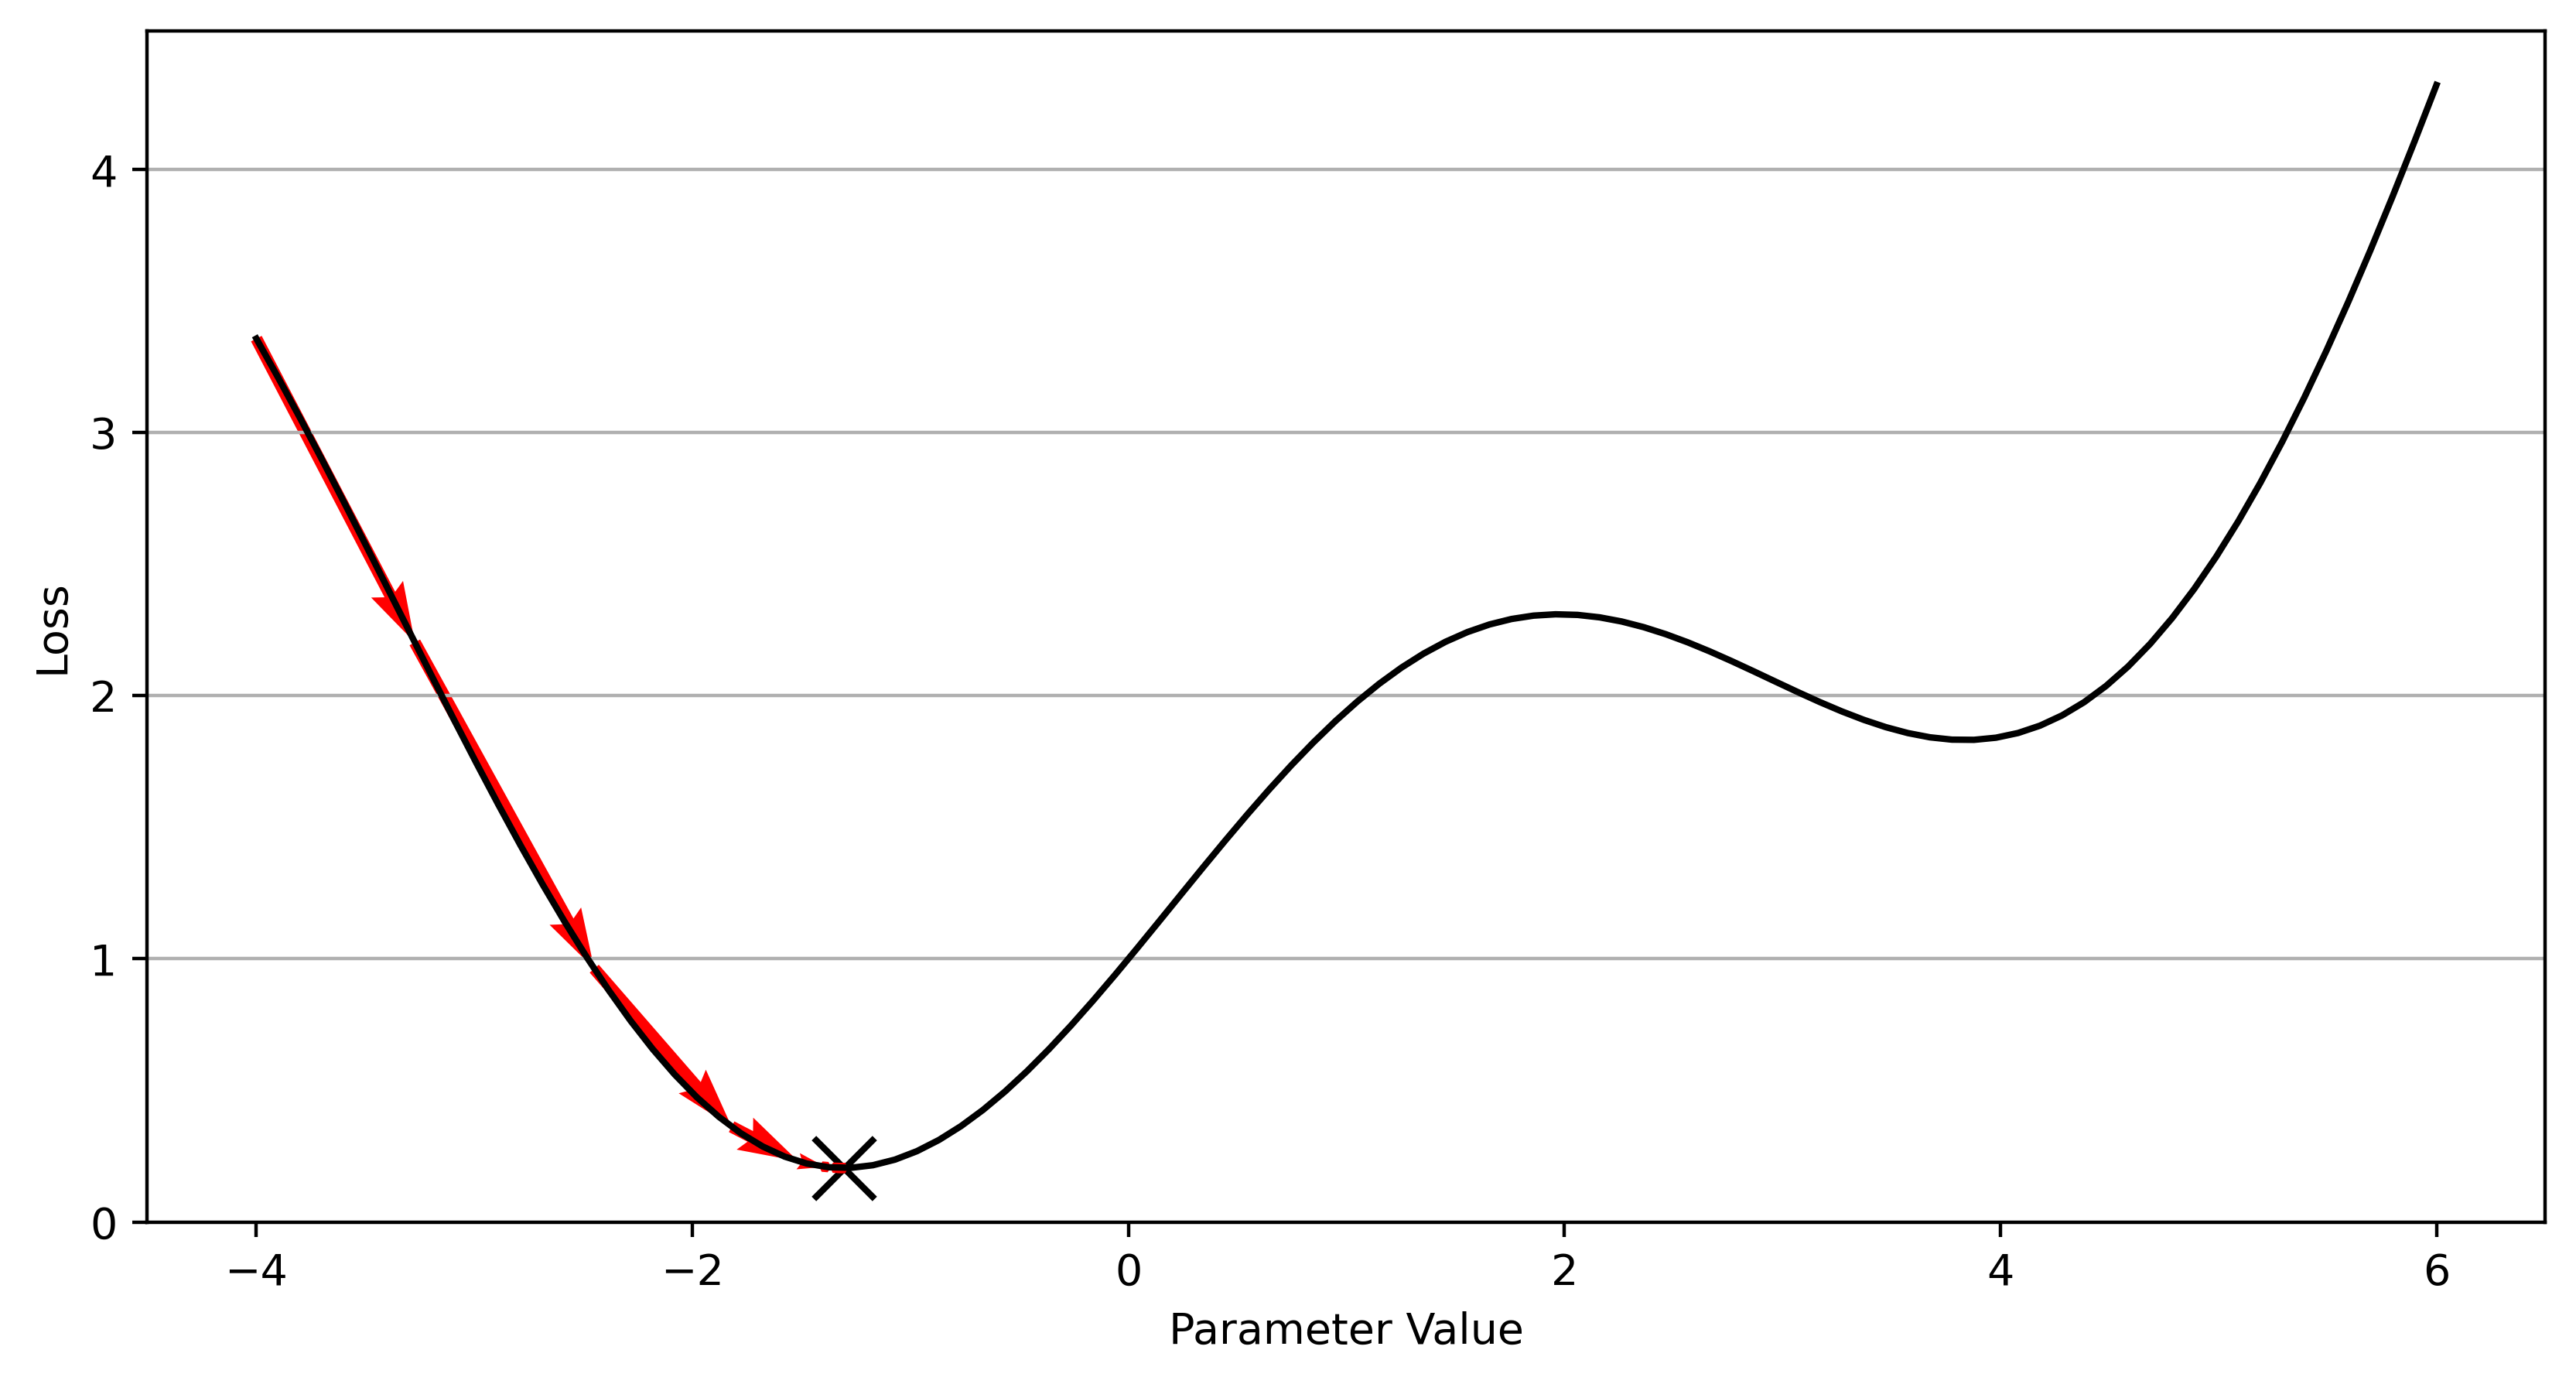

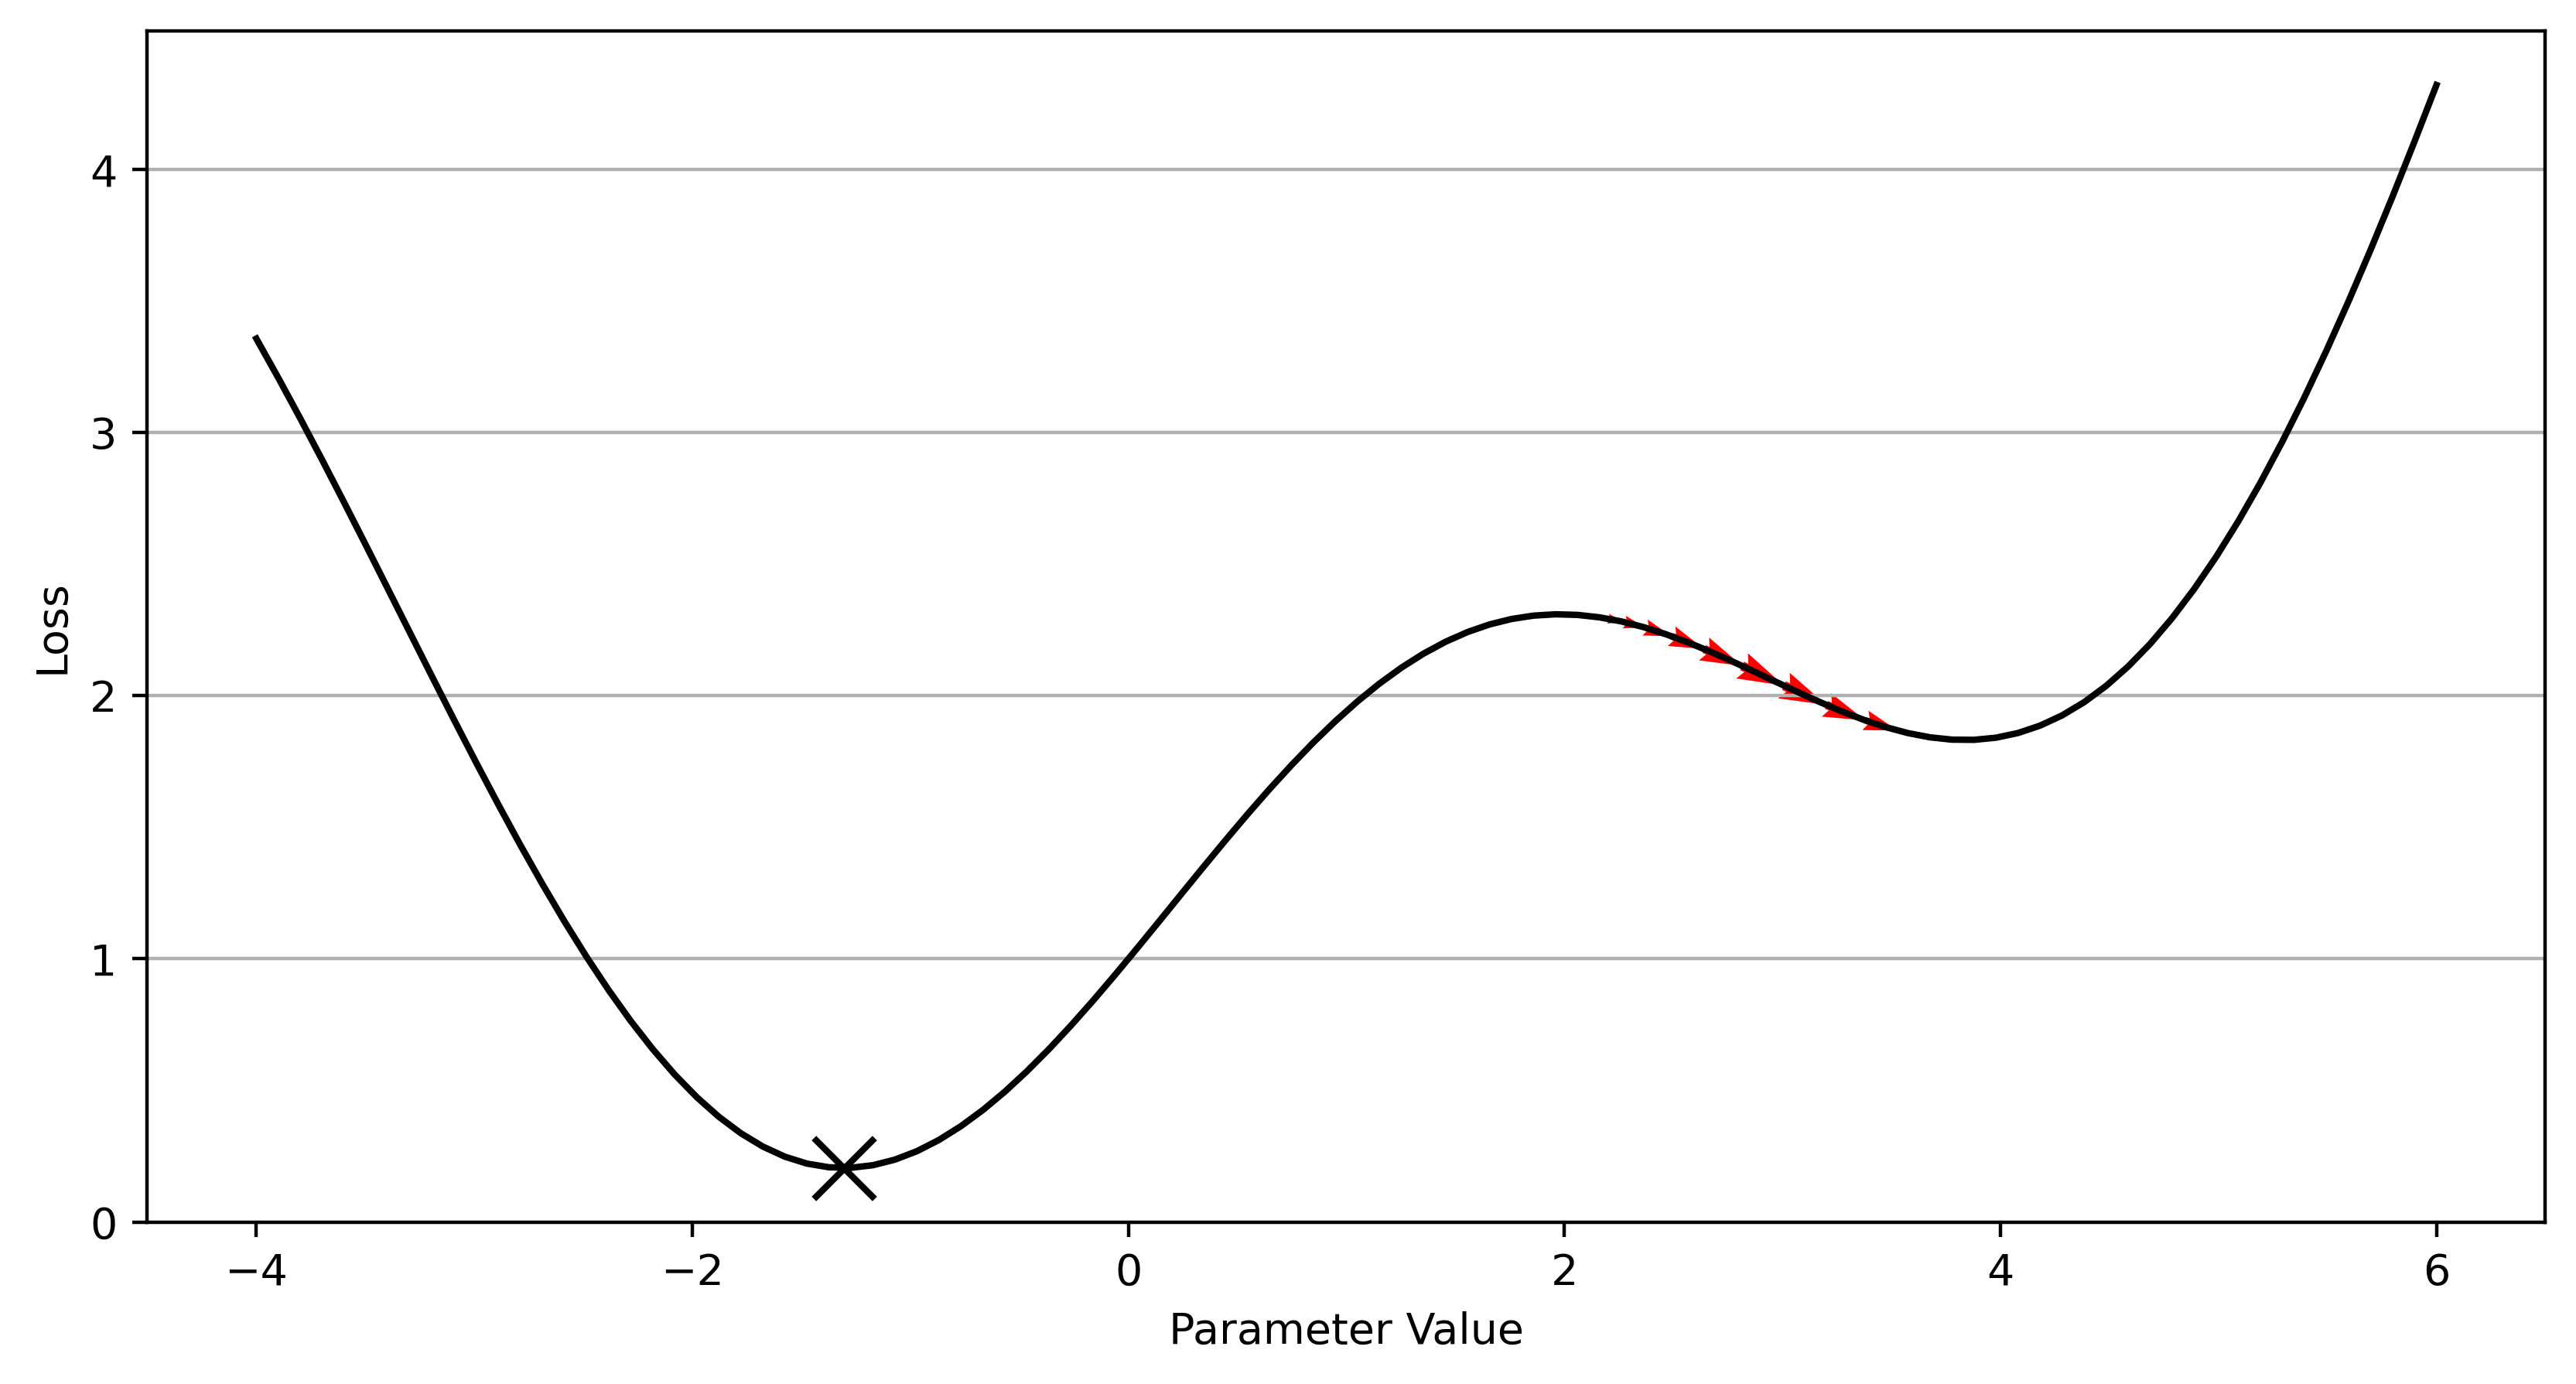

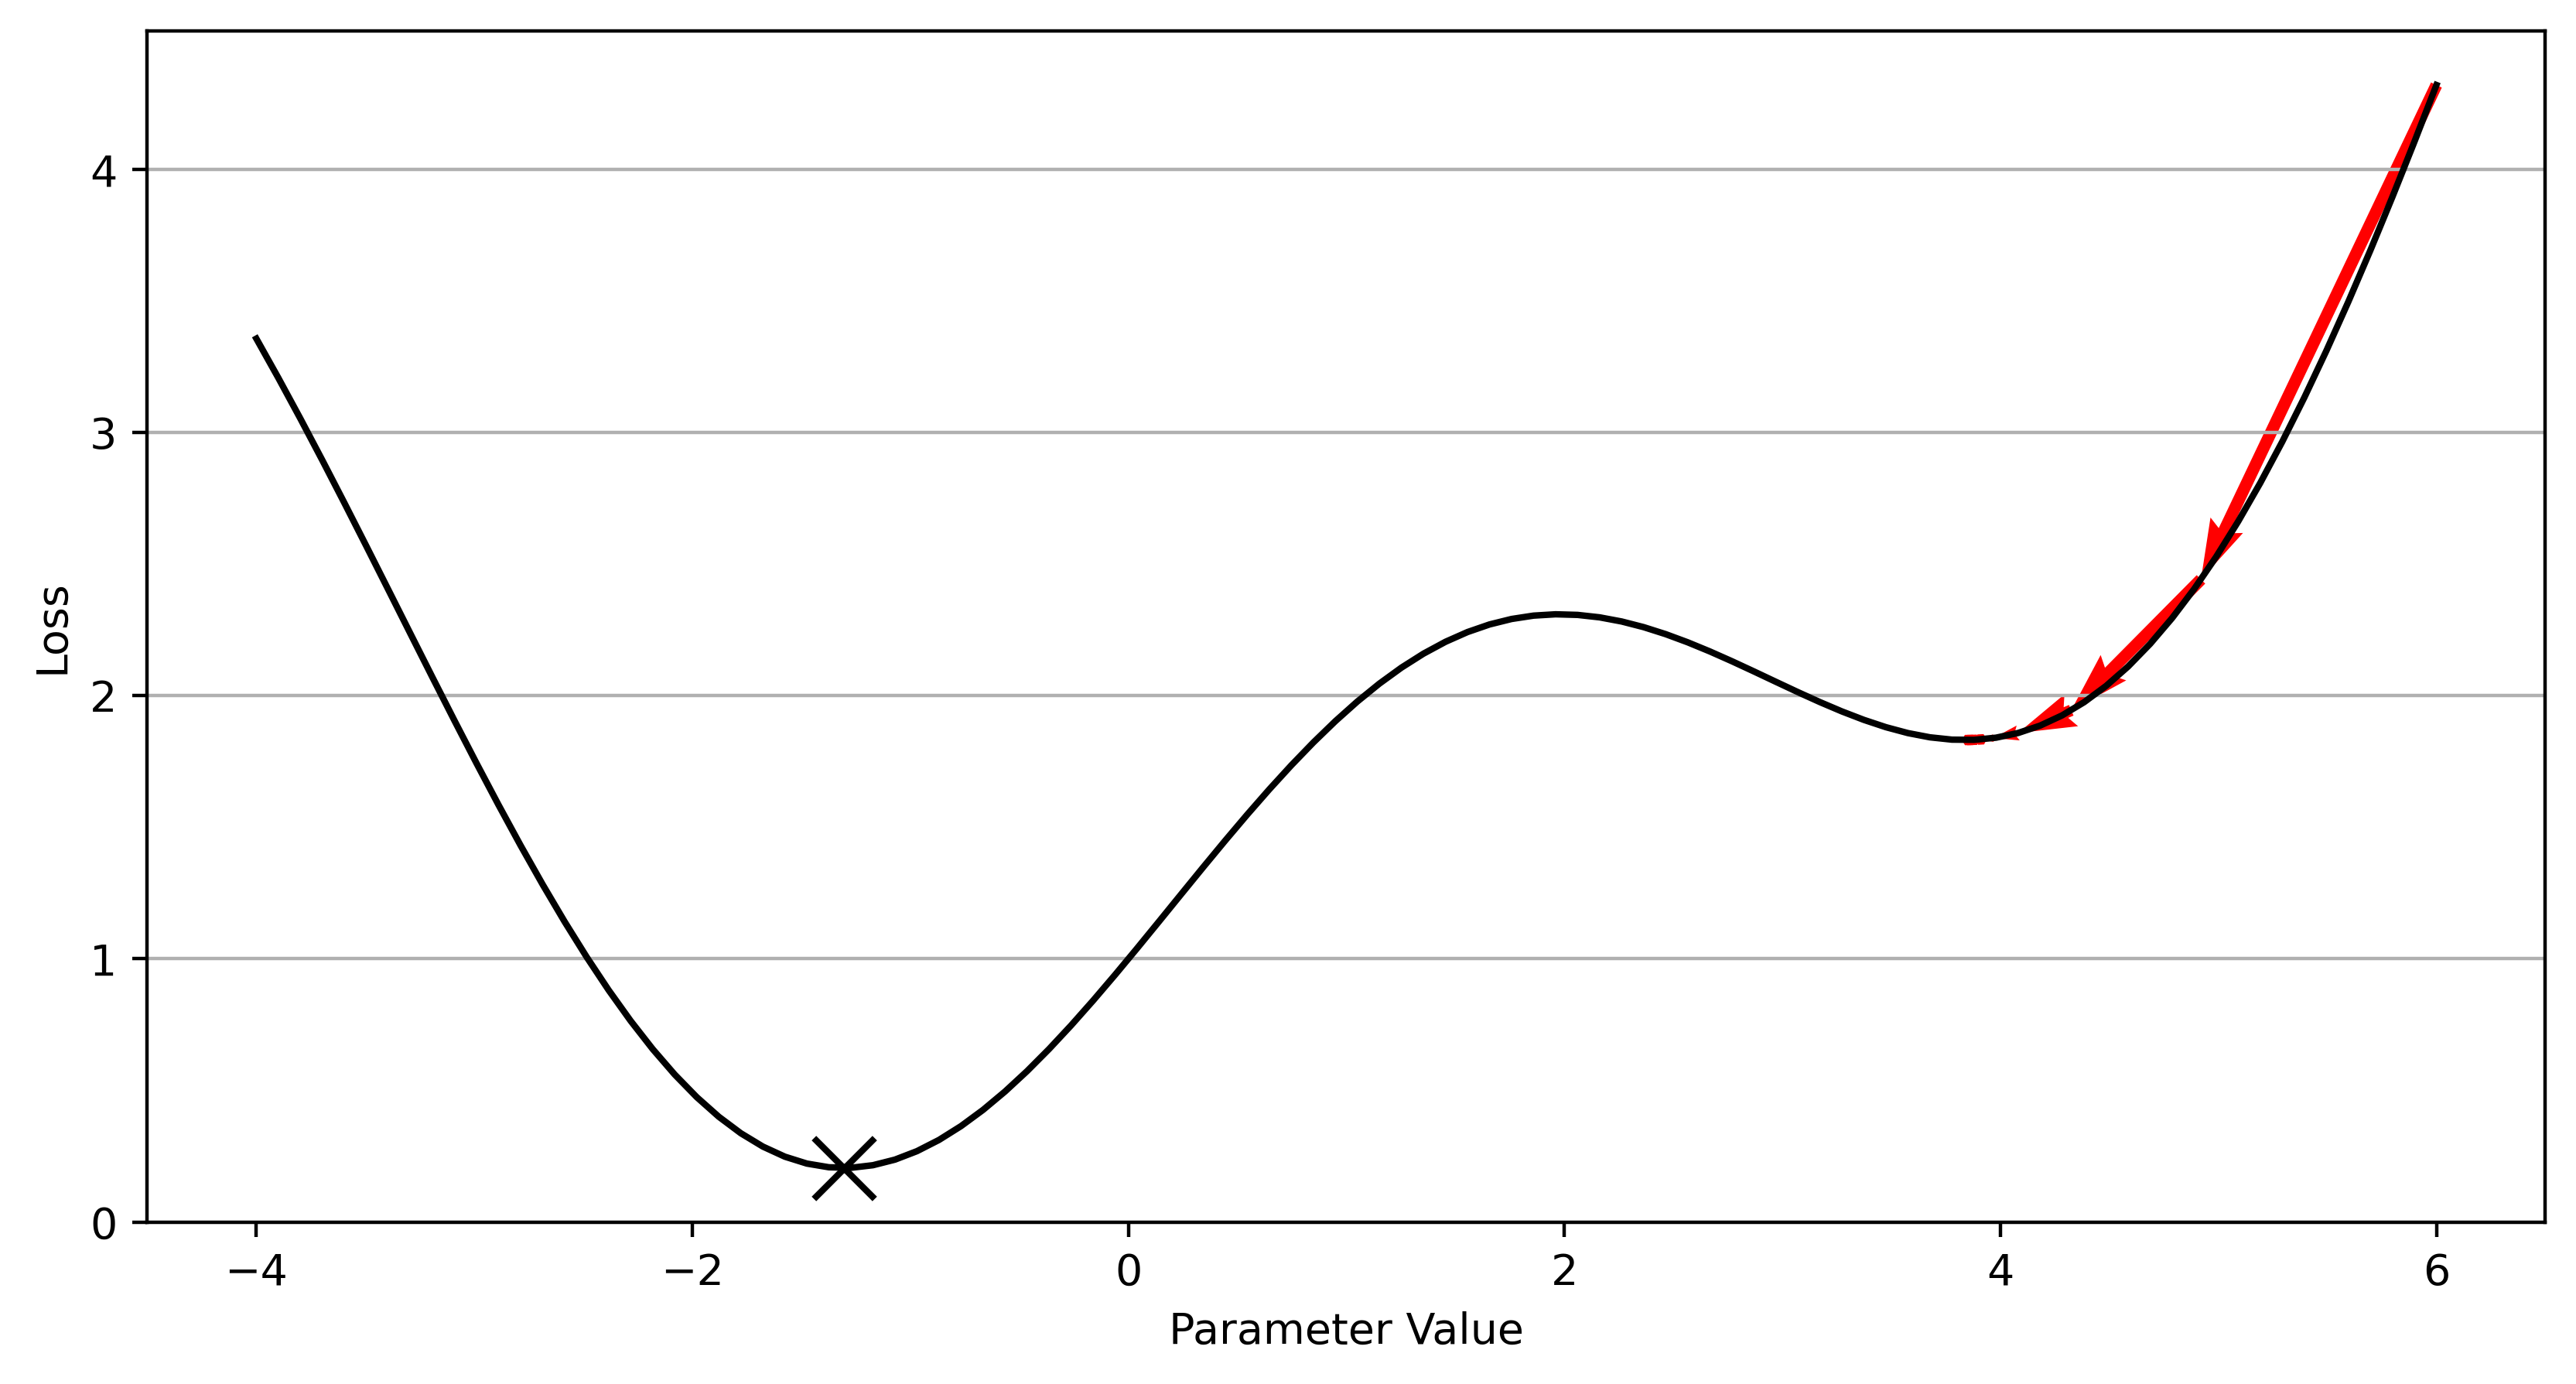

In [13]:
def plot_gd_min(learn_rate = 0.5, curr_x = 6):

    cost = lambda x: np.sin(x) + x**2 / 10 + 1
    gradient = lambda x: np.cos(x) + 2*x / 10

    x = []
    for iteration in range(10):
        x.append(curr_x)
        curr_x += -learn_rate * gradient(curr_x)

    features = np.linspace(-4, 6, 100)
    targets = np.sin(features) + features**2/10 + 1

    f = lambda x:np.sin(x) + x**2/10 + 1

    plt.figure(figsize=(10, 5), dpi=400)
    axes = plt.gca()
    axes.yaxis.grid()

    plt.scatter([-1.306], [0.205], color='black', marker='x', s=200)
    x = np.array(x)
    axes.quiver(x[:-1], 
              f(x)[:-1], 
              ([x[i+1]-x[i] for i in range(len(x[:-1]))]), 
              ([f(x)[i+1]-f(x)[i] for i in range(len(f(x)[:-1]))]), 
              angles='xy', 
              scale_units='xy', 
              scale=1,
              linestyle='--',
              width=0.005,
              color='red')

    plt.plot(features, targets, color='black')

    plt.ylabel('Loss')
    plt.xlabel('Parameter Value')

    plt.show()

plot_gd_min(learn_rate = 0.5, curr_x = -4)
plot_gd_min(learn_rate = 0.5, curr_x = 2.2)
plot_gd_min(learn_rate = 0.5, curr_x = 6)

---------------
Plotting simple linear regression fitting example with gradient descent

In [15]:
features_array = np.array(features)
print(features_array[0:2])

[[           nan 2.04890456e+02 2.07913190e+04 7.30021187e+00
  3.68516441e+02 5.64308654e+02 1.03797831e+01 8.69909705e+01
  2.96313538e+00]
 [3.71608007e+00 1.29422921e+02 1.86300579e+04 6.63524588e+00
             nan 5.92885359e+02 1.51800131e+01 5.63290763e+01
  4.50065627e+00]]


In [28]:
X = [np.array([0, 1]), np.array([1, 2]), np.array([3, 4]), np.array([5])]
y = np.array([0, 2, 5, 6, 7, 11])

In [29]:
def predict(beta, X):
    return beta * X

def gradient(beta, X, y):
    errors = np.array([predict(beta, xi) - yi for xi, yi in zip(X, y)])
    return np.mean(errors)

In [30]:
# plot value of beta over time
learn_rate = 0.02
curr_beta = 0
history = []

for iteration in range(100):
    curr_beta += -learn_rate * gradient(curr_beta, X, y)
    history.append(curr_beta)

plt.figure(figsize=(10, 5), dpi=400)
plt.plot(np.arange(1, 101), history, color='red')
plt.xlabel('Iteration')
plt.ylabel('Value of Beta')
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [8]:
# plot how line changes across iterations
# (plot every 10 iterations with increasing boldness)
learn_rate = 0.05
curr_beta = -1

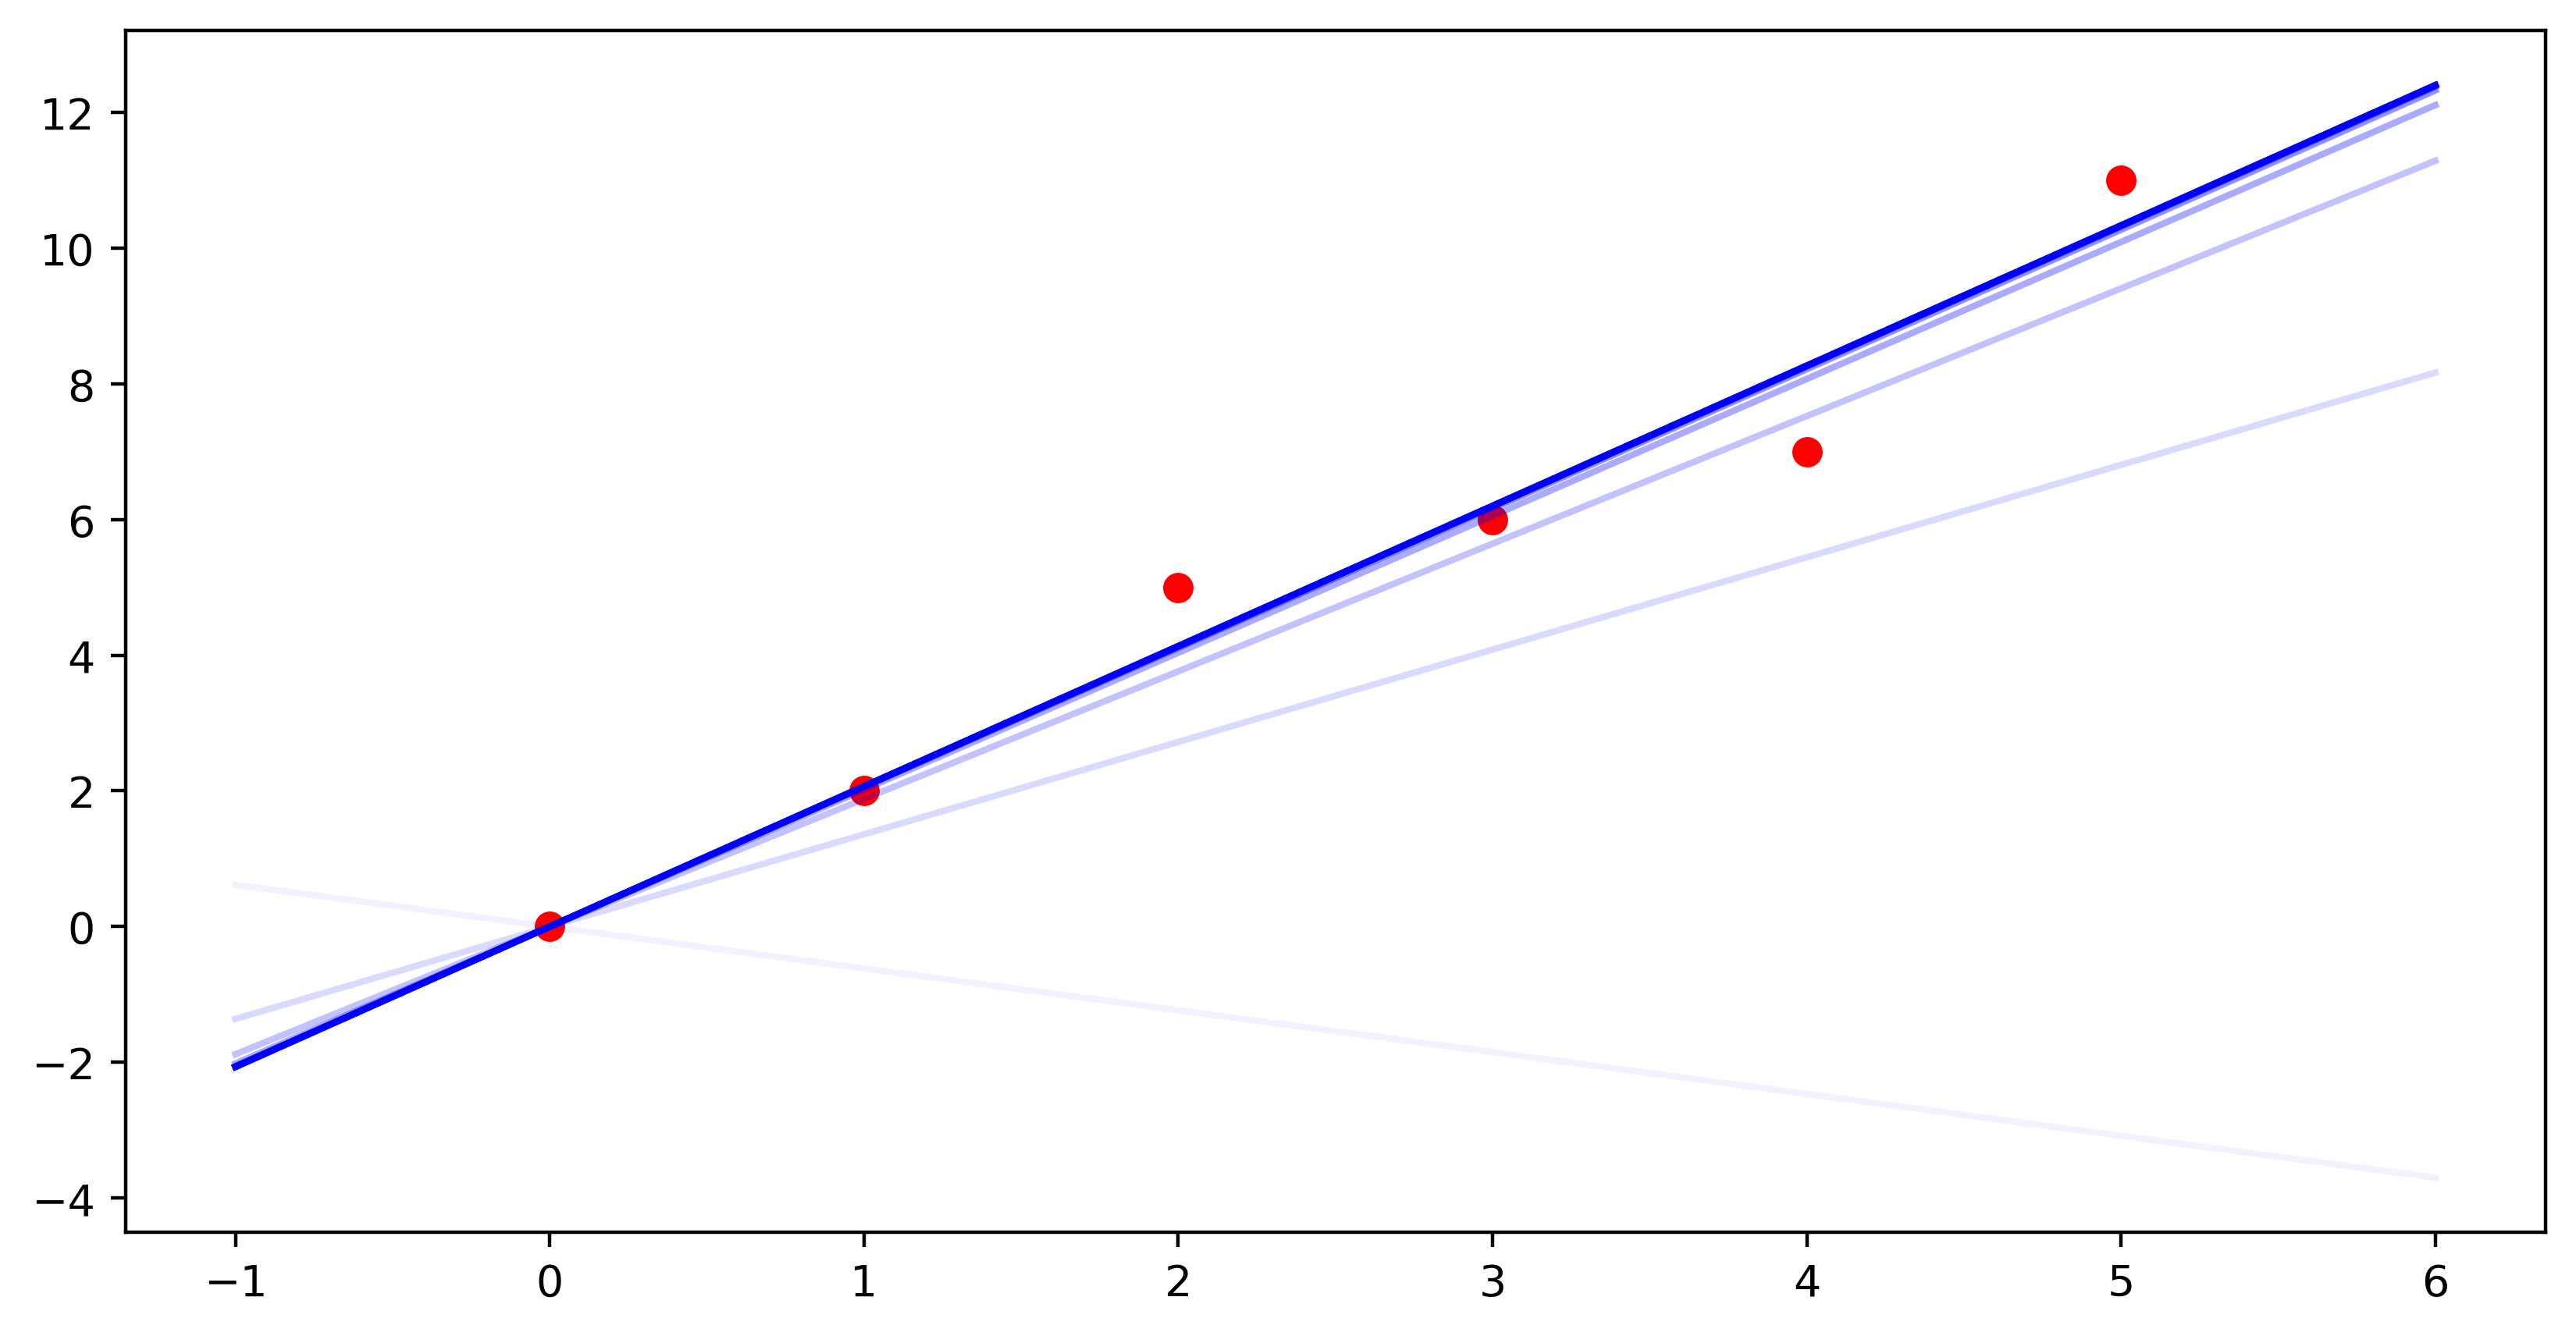

In [9]:
plt.figure(figsize=(10, 5), dpi=400)

for iteration in range(100):
    curr_beta += -learn_rate * gradient(curr_beta, x, y)
    
    if iteration % 10 == 0:
        px = np.linspace(-1, 6, 100)
        py = curr_beta * px
        plt.plot(px, py, alpha=1 - (1 - iteration/100) * 0.95, color='blue')

plt.scatter(x, y, color='red')

plt.show()